In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from textwrap3 import wrap
print('setup complete')

setup complete


In [2]:
df = pd.read_csv('ikea.csv')
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [3]:
df.columns

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [5]:
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.isna().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# Count the median value for depth for each categories
median_depth = df.groupby(['category'])['depth'].median().reset_index()
median_depth.columns = ['category', 'MedianDepth']

# Count the median value for height for each categories
median_height = df.groupby(['category'])['height'].median().reset_index()
median_height.columns = ['category', 'MedianHeight']

# Count the median value for width for each categories
median_width = df.groupby(['category'])['width'].median().reset_index()
median_width.columns = ['category', 'MedianWidth']

# Create new dataframe that contain the median for each dimensions, from each categories
median_size = pd.merge(pd.merge(median_depth,median_height,on='category'),
median_width,on='category')
median_size

,category,MedianDepth,MedianHeight,MedianWidth
0,Bar furniture,47.0,102.0,48.0
1,Beds,88.0,84.0,140.0
2,Bookcases & shelving units,36.0,147.0,81.0
3,Cabinets & cupboards,38.0,101.0,80.0
4,Café furniture,46.5,77.5,53.0
5,Chairs,53.5,77.0,67.0
6,Chests of drawers & drawer units,47.0,73.0,67.0
7,Children's furniture,45.0,67.0,56.0
8,Nursery furniture,44.0,86.5,60.0
9,Outdoor furniture,67.0,73.0,62.5


In [9]:
# Merge the median dataframe with existing dataframe
df = pd.merge(df,median_size,on='category')

# Fill the null values in each dimension column, 
# with the average median value
df['depth'] = df['depth'].fillna(df['MedianDepth'])
df['height'] = df['height'].fillna(df['MedianHeight'])
df['width'] = df['width'].fillna(df['MedianWidth'])


In [10]:
df.isna().sum()

item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
MedianDepth          0
MedianHeight         0
MedianWidth          0
dtype: int64

In [11]:
df.drop(['MedianDepth','MedianHeight','MedianWidth'], axis='columns',inplace=True)

In [13]:
df['volume'] = df['depth'] * df['height'] * df['width']

In [14]:
df['old_price'].values

array(['No old price', 'No old price', 'No old price', ..., 'SR 1,050',
       'SR 3,130', 'SR 1,535'], dtype=object)

In [15]:
# Create the fix_old_price function
def fix_old_price(df):
    
    # fill in price to old_price for No old price
    if df['old_price']  == 'No old price':
        return df['price']

    # remove SR and , from old_price
    elif df['old_price'][-4:] != 'pack':
        return float(str(df['old_price'])[3:].replace(',',''))
        
    else:
        return np.nan

# create new column price_diff, to help identified is there any different 
# between price with old_price
df['price_diff'] = (df['old_price'] != 'No old price').astype(int)

# apply the function
df['old_price'] = df.apply(fix_old_price, axis=1)
df[['price', 'old_price']].head()

,price,old_price
0,265.0,265.0
1,995.0,995.0
2,2095.0,2095.0
3,69.0,69.0
4,225.0,225.0


In [16]:
df['old_price'] = df['old_price'].fillna(df['price'])

In [17]:
df['diff_amount'] = df['old_price'] - df['price']

In [18]:
df.isna().sum()

item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
volume               0
price_diff           0
diff_amount          0
dtype: int64

<AxesSubplot: >

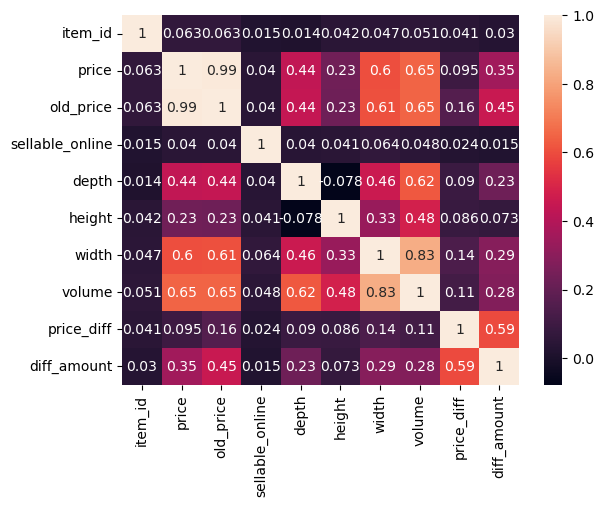

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
df.describe()

,item_id,price,old_price,depth,height,width,volume,price_diff,diff_amount
count,3.694000e+03,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3.694000e+03,3694.000000,3694.000000
mean,4.863240e+07,1078.208419,1125.014348,55.880211,98.524228,105.420953,7.058127e+05,0.177044,46.805929
std,2.888709e+07,1374.652494,1443.543124,26.683012,55.201894,68.800229,9.146756e+05,0.381757,170.552565
min,5.848700e+04,3.000000,3.000000,1.000000,1.000000,1.000000,4.000000e+01,0.000000,0.000000
25%,2.039057e+07,180.900000,195.000000,40.000000,73.000000,60.000000,2.042400e+05,0.000000,0.000000
50%,4.928808e+07,544.700000,550.000000,46.500000,80.000000,80.000000,3.072000e+05,0.000000,0.000000
75%,7.040357e+07,1429.500000,1495.000000,65.000000,105.000000,141.000000,8.640000e+05,0.000000,0.000000
max,9.993262e+07,9585.000000,9985.000000,257.000000,700.000000,420.000000,1.362900e+07,1.000000,1997.000000


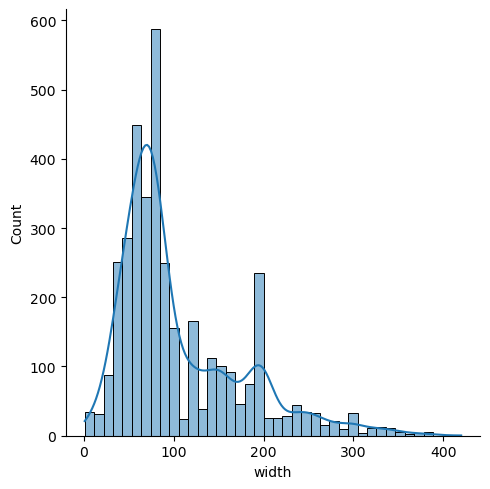

In [26]:
sns.displot(df['width'], kde=True)

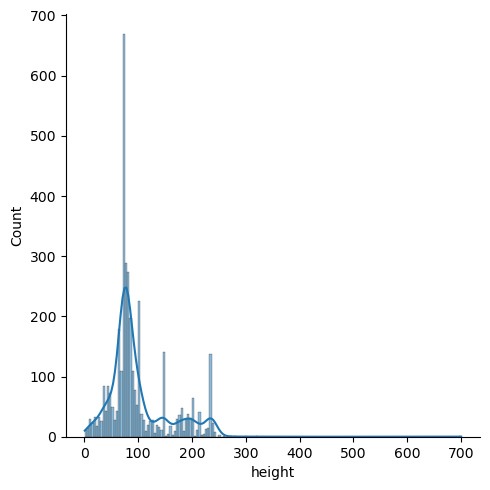

In [27]:
sns.displot(df['height'],kde=True)

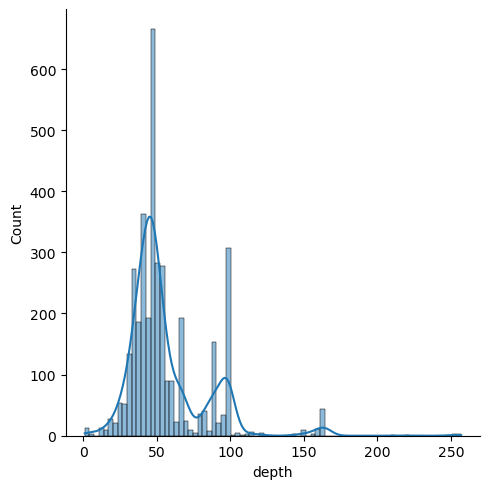

In [28]:
sns.displot(df['depth'],kde=True)

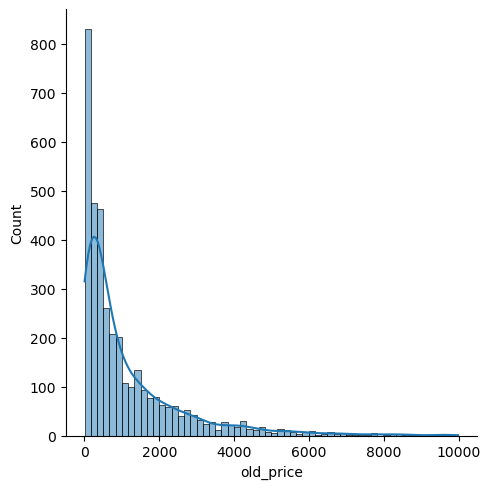

In [29]:
sns.displot(df['old_price'],kde=True)

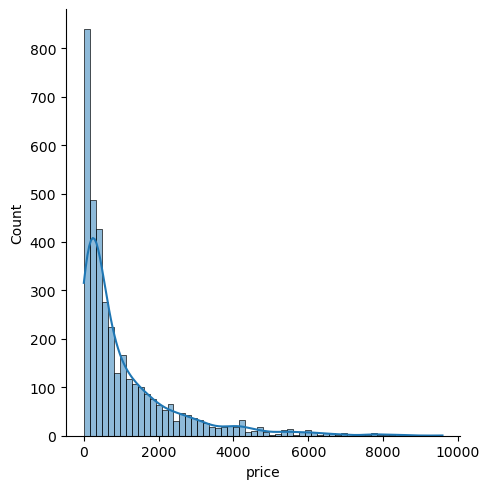

In [31]:
sns.displot(df['price'],kde=True)

In [32]:
df.columns.to_list()

['item_id',
 'name',
 'category',
 'price',
 'old_price',
 'sellable_online',
 'link',
 'other_colors',
 'short_description',
 'designer',
 'depth',
 'height',
 'width',
 'volume',
 'price_diff',
 'diff_amount']

<AxesSubplot: >

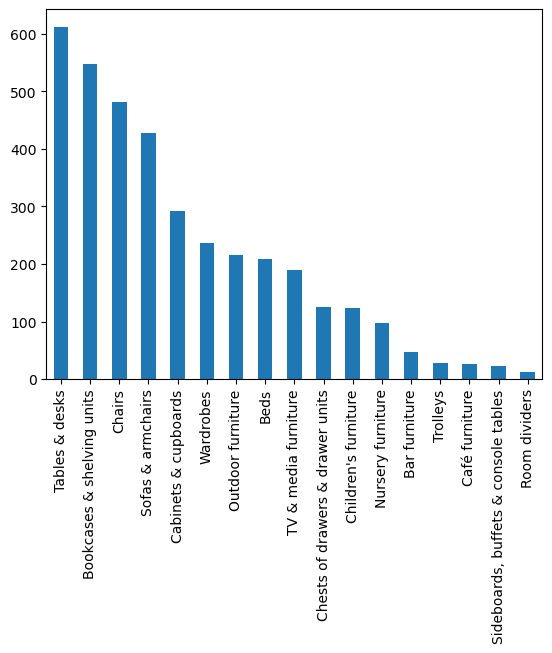

In [35]:
df['category'].value_counts().plot(kind='bar')

In [40]:
index_pi = df['category'].value_counts().index

In [42]:
value_pi = df['category'].value_counts().values

In [46]:
fig = px.pie(names=index_pi,values=value_pi,hole=0.6)
fig.show()

In [47]:
df.columns

Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'link', 'other_colors', 'short_description', 'designer', 'depth',
       'height', 'width', 'volume', 'price_diff', 'diff_amount'],
      dtype='object')